.<a href="https://www.spe.org/events/en/2022/conference/22apog/asia-pacific-oil-and-gas-conference-and-exhibition.html"><img src = "https://www.spe.org/binaries/content/gallery/specms/speevents/organization-logos/spe-logo-2020.png" width = 200> 

<h1 align=center><font size = 5>Prediction of Recovery Factor using Machine Learning Methods</font></h1>

<h1 align=center><font size = 4> Munish Kumar, Kannapan Swaminathan</font></h1>
<h1 align=center><font size = 3> ERCE 2022 </font></h1>

#### Libraries

In [1]:
# Only install the following libraries if you dont have it, otherwise leave it commented out

#!conda install -c anaconda natsort --yes
#!conda install -c anaconda xlrd --yes
#!conda install -c anaconda plotly --yes
#!conda install -c anaconda folium --yes
#!pip install folium

# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
from natsort import natsorted
sns.set()

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Sklearn Liraries
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

import folium
import shapefile as shp

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


###### Declare some global variables

In [2]:
#Receive Data
#dir_name = r'C:\Users\mkumar\Documents\GitHub\munishkumar-gh.github.io\@Working\SPE_Paper'
dir_name = r'C:\Users\kswaminathan\OneDrive\01_KannaLibrary\15_Analogs'
filename_suffix = 'csv'

##### Read in the data and some preprocessing

In [3]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
df = pd.read_csv("CP4_CARB_OIL_RF_data.csv", thousands=',', skiprows = skiprows)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df.head()

,1_Field name,2_Reservoir unit,5_Resource uncertainty,8_Country,10_Region,11_Basin name,15_Latitude,16_Longitude,18_Hydrocarbon type (main),32_Current status year,...,320_Secondary recovery methods,325_EOR methods,333_Improved recovery methods (other),334_Improved recovery methods (drilling),335_Improved recovery methods (stimulation),336_Improved recovery methods (water injection optimization),337_Improved recovery methods (artificial lift),338_Improved recovery methods (sand control),339_Improved recovery methods (other reservoir management),76_Pressure_Temp_depth (ft TVDSS)
0,25 DE MAYO-MEDANITO SE,QUINTUCO,1P,ARGENTINA,LATIN AMERICA,NEUQUEN,-37.9935,-67.9567,OIL,2012.0,...,CONTINUOUS WATER INJECTION,NaN,DRILLING/STIMULATION/ARTIFICIAL LIFT,INFILL WELL,ACIDIZATION/HYDRAULIC FRACTURING (SINGLE STAGE),NaN,ESP,NaN,NaN,NaN
1,A.J.BERMUDEZ,UNNAMED,1P,MEXICO,LATIN AMERICA,CHIAPAS-TABASCO,17.9833,-93.1000,OIL,2008.0,...,CONTINUOUS WATER INJECTION/GAS INJECTION,NaN,DRILLING/STIMULATION/ARTIFICIAL LIFT/SAND CONTROL,INFILL WELL/HORIZONTAL WELL,ACIDIZATION,NaN,GAS LIFT,SLOTTED LINER,NaN,15223.0
2,AB TEYMUR,ILAM,1P,IRAN,MIDDLE EAST,ZAGROS,31.2097,48.4957,OIL,2000.0,...,NaN,NaN,STIMULATION,NaN,ACIDIZATION,NaN,NaN,NaN,NaN,10298.0
3,AB TEYMUR,SARVAK 1,1P,IRAN,MIDDLE EAST,ZAGROS,31.2097,48.4957,OIL,2000.0,...,NaN,NaN,STIMULATION,NaN,ACIDIZATION,NaN,NaN,NaN,NaN,12054.0
4,ABKATUN,BRECCIA,1P,MEXICO,LATIN AMERICA,CAMPECHE,19.2100,-91.9833,OIL,,...,CONTINUOUS WATER INJECTION,NaN,DRILLING/ARTIFICIAL LIFT/OTHER RESERVOIR MANAG...,INFILL WELL/HORIZONTAL WELL,ACIDIZATION,NaN,GAS LIFT,NaN,WATER PLUGGING,11844.0


In [4]:
#Database Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 63 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   1_Field name                                                  354 non-null    object 
 1   2_Reservoir unit                                              354 non-null    object 
 2   5_Resource uncertainty                                        354 non-null    object 
 3   8_Country                                                     354 non-null    object 
 4   10_Region                                                     354 non-null    object 
 5   11_Basin name                                                 354 non-null    object 
 6   15_Latitude                                                   354 non-null    float64
 7   16_Longitude                                                  354 non-n

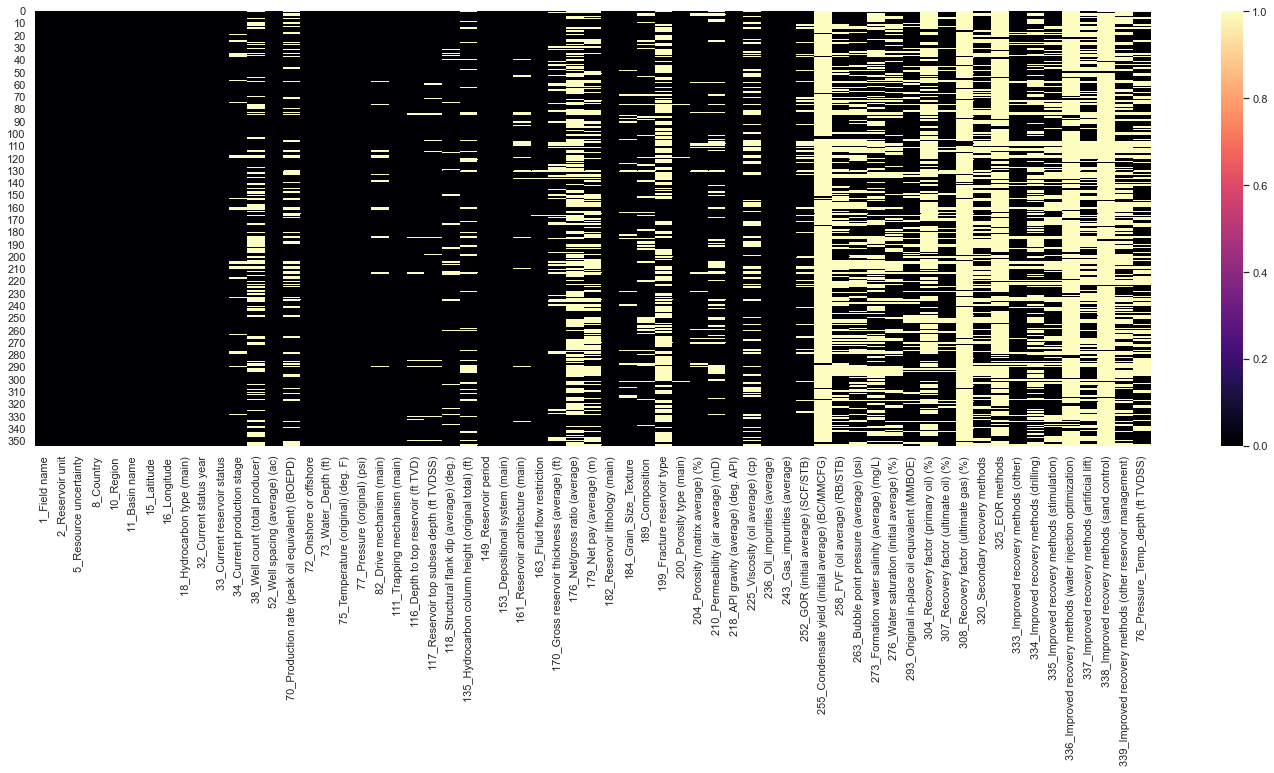

In [5]:
#Missing Values
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

In [6]:
#Creating a base map
m = folium.Map()

for lat, lon, name in zip(df['15_Latitude'],df['16_Longitude'],df['1_Field name']):
    #Creating the marker
    folium.Marker(
    #Coordinate of the country
    location=[lat, lon],
    #The popup that show up if click the marker
    popup=name
    ).add_to(m)
m



In [7]:
print(df.shape)

(354, 63)


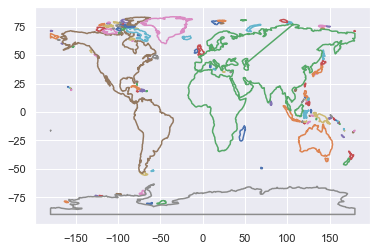

In [8]:
#%matplotlib inline
#import shapefile as shp  # Requires the pyshp package
#import matplotlib.pyplot as plt

sf = shp.Reader("ne_110m_land.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

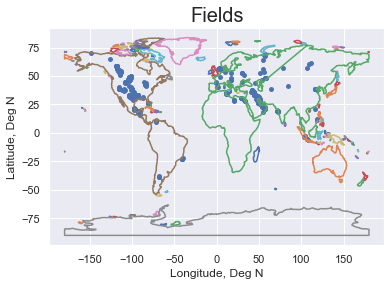

In [9]:
x = df['16_Longitude']
y = df['15_Latitude']

fig, ax = plt.subplots()
s = ax.scatter(x, y,
               color = 'b',
               s=15,
               marker='o')                   # Plot circles
               #alpha = 0.2 )
               
plt.title('Fields', fontsize = 20)
plt.ylabel('Latitude, Deg N')
plt.xlabel('Longitude, Deg N')

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

##### Clean and Filter database for only Oil Reservoirs with Sandstone Lithology

In [10]:
#Clean and filter database for only Oil Reservoirs with Sandstone Lithology 
dflsoil = df.copy()

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
#Null Values in Database
dflsoil.isnull().sum().sort_values(ascending=False)

338_Improved recovery methods (sand control)                    342
255_Condensate yield (initial average) (BC/MMCFG)               341
308_Recovery factor (ultimate gas) (%)                          329
336_Improved recovery methods (water injection optimization)    313
325_EOR methods                                                 294
304_Recovery factor (primary oil) (%)                           223
176_Net/gross ratio (average)                                   203
199_Fracture reservoir type                                     191
339_Improved recovery methods (other reservoir management)      179
337_Improved recovery methods (artificial lift)                 177
273_Formation water salinity (average) (mg/L)                   166
334_Improved recovery methods (drilling)                        162
76_Pressure_Temp_depth (ft TVDSS)                               140
258_FVF (oil average) (RB/STB)                                  139
179_Net pay (average) (m)                       

In [13]:
dflsoil.shape

(354, 63)

In [14]:
#Drop Drop Unnecessary Columns not related to oil reservoirs with sandstone lithology
dflsoil.drop(['255_Condensate yield (initial average) (BC/MMCFG)', '199_Fracture reservoir type', 
              '308_Recovery factor (ultimate gas) (%)', '273_Formation water salinity (average) (mg/L)', 
             '189_Composition', '184_Grain_Size_Texture', '163_Fluid flow restriction', '236_Oil_impurities (average)',
             '2_Reservoir unit', '111_Trapping mechanism (main)', '243_Gas_impurities (average)' ], axis=1, inplace=True)

In [15]:
#Check Drive Mechanism Column
print(dflsoil['82_Drive mechanism (main)'].value_counts())

AQUIFER DRIVE           180
GAS DRIVE               158
CAPILLARY IMBIBITION      1
Name: 82_Drive mechanism (main), dtype: int64


In [16]:
#print(dfssoil['320_Secondary recovery methods'].value_counts())
#print(dfssoil['325_EOR methods'].value_counts())
#print(dfssoil['333_Improved recovery methods (other)'].value_counts())
#print(dfssoil['334_Improved recovery methods (drilling)'].value_counts())
#print(dfssoil['335_Improved recovery methods (stimulation)'].value_counts())
#print(dfssoil['336_Improved recovery methods (water injection optimization)'].value_counts())
#print(dfssoil['337_Improved recovery methods (artificial lift)'].value_counts())
#print(dfssoil['338_Improved recovery methods (sand control)'].value_counts())
#print(dfssoil['339_Improved recovery methods (other reservoir management)'].value_counts())

In [17]:
# Collapse IOR EOR 
dfEORIOR = pd.DataFrame(dflsoil, columns=['320_Secondary recovery methods', '325_EOR methods', '333_Improved recovery methods (other)',
                                         '334_Improved recovery methods (drilling)','335_Improved recovery methods (stimulation)', 
                                          '336_Improved recovery methods (water injection optimization)', 
                                          '337_Improved recovery methods (artificial lift)', '338_Improved recovery methods (sand control)'
                                         '339_Improved recovery methods (other reservoir management)'])

In [18]:
dfEORIOR.head()

,320_Secondary recovery methods,325_EOR methods,333_Improved recovery methods (other),334_Improved recovery methods (drilling),335_Improved recovery methods (stimulation),336_Improved recovery methods (water injection optimization),337_Improved recovery methods (artificial lift),338_Improved recovery methods (sand control)339_Improved recovery methods (other reservoir management)
0,CONTINUOUS WATER INJECTION,NaN,DRILLING/STIMULATION/ARTIFICIAL LIFT,INFILL WELL,ACIDIZATION/HYDRAULIC FRACTURING (SINGLE STAGE),NaN,ESP,NaN
1,CONTINUOUS WATER INJECTION/GAS INJECTION,NaN,DRILLING/STIMULATION/ARTIFICIAL LIFT/SAND CONTROL,INFILL WELL/HORIZONTAL WELL,ACIDIZATION,NaN,GAS LIFT,NaN
2,NaN,NaN,STIMULATION,NaN,ACIDIZATION,NaN,NaN,NaN
3,NaN,NaN,STIMULATION,NaN,ACIDIZATION,NaN,NaN,NaN
4,CONTINUOUS WATER INJECTION,NaN,DRILLING/ARTIFICIAL LIFT/OTHER RESERVOIR MANAG...,INFILL WELL/HORIZONTAL WELL,ACIDIZATION,NaN,GAS LIFT,NaN


In [19]:
dfrf = pd.DataFrame(dflsoil, columns=['304_Recovery factor (primary oil) (%)', '307_Recovery factor (ultimate oil) (%)'])

In [20]:
print(dfrf.isnull().sum().sort_values(ascending=False))
dfrf.describe()

304_Recovery factor (primary oil) (%)     223
307_Recovery factor (ultimate oil) (%)     53
dtype: int64


,304_Recovery factor (primary oil) (%),307_Recovery factor (ultimate oil) (%)
count,131.000000,301.000000
mean,22.298092,35.003289
std,13.852723,15.463186
min,1.500000,3.900000
25%,13.400000,23.300000
50%,18.300000,34.100000
75%,28.700000,45.000000
max,75.000000,88.000000


In [21]:
dflsoil.isnull().sum().sort_values(ascending=False)

338_Improved recovery methods (sand control)                    342
336_Improved recovery methods (water injection optimization)    313
325_EOR methods                                                 294
304_Recovery factor (primary oil) (%)                           223
176_Net/gross ratio (average)                                   203
339_Improved recovery methods (other reservoir management)      179
337_Improved recovery methods (artificial lift)                 177
334_Improved recovery methods (drilling)                        162
76_Pressure_Temp_depth (ft TVDSS)                               140
258_FVF (oil average) (RB/STB)                                  139
179_Net pay (average) (m)                                       138
263_Bubble point pressure (average) (psi)                       134
320_Secondary recovery methods                                  130
335_Improved recovery methods (stimulation)                     127
38_Well count (total producer)                  

In [22]:
dflsoil['336a_Improved recovery methods (water injection optimization)'] = np.where(dflsoil['336_Improved recovery methods (water injection optimization)'].isnull(), 0, 1)
dflsoil['338a_Improved recovery methods (sand control)'] = np.where(dflsoil['338_Improved recovery methods (sand control)'].isnull(), 0, 1)
dflsoil['325a_EOR methods'] = np.where(dflsoil['325_EOR methods'].isnull(), 0, 1)
dflsoil['335a_Improved recovery methods (stimulation)'] = np.where(dflsoil['335_Improved recovery methods (stimulation)'].isnull(), 0, 1)
dflsoil['339a_Improved recovery methods (other reservoir management)'] = np.where(dflsoil['339_Improved recovery methods (other reservoir management)'].isnull(), 0, 1)
dflsoil['337a_Improved recovery methods (artificial lift)'] = np.where(dflsoil['337_Improved recovery methods (artificial lift)'].isnull(), 0, 1)
dflsoil['334a_Improved recovery methods (drilling)'] = np.where(dflsoil['334_Improved recovery methods (drilling)'].isnull(), 0, 1)
dflsoil['320a_Secondary recovery methods'] = np.where(dflsoil['320_Secondary recovery methods'].isnull(), 0, 1)
dflsoil['333a_Improved recovery methods (other)'] = np.where(dflsoil['333_Improved recovery methods (other)'].isnull(), 0, 1)

In [23]:
dflsoil.head()

,1_Field name,5_Resource uncertainty,8_Country,10_Region,11_Basin name,15_Latitude,16_Longitude,18_Hydrocarbon type (main),32_Current status year,33_Current reservoir status,...,76_Pressure_Temp_depth (ft TVDSS),336a_Improved recovery methods (water injection optimization),338a_Improved recovery methods (sand control),325a_EOR methods,335a_Improved recovery methods (stimulation),339a_Improved recovery methods (other reservoir management),337a_Improved recovery methods (artificial lift),334a_Improved recovery methods (drilling),320a_Secondary recovery methods,333a_Improved recovery methods (other)
0,25 DE MAYO-MEDANITO SE,1P,ARGENTINA,LATIN AMERICA,NEUQUEN,-37.9935,-67.9567,OIL,2012.0,SECONDARY RECOVERY,...,NaN,0,0,0,1,0,1,1,1,1
1,A.J.BERMUDEZ,1P,MEXICO,LATIN AMERICA,CHIAPAS-TABASCO,17.9833,-93.1000,OIL,2008.0,SECONDARY RECOVERY,...,15223.0,0,1,0,1,0,1,1,1,1
2,AB TEYMUR,1P,IRAN,MIDDLE EAST,ZAGROS,31.2097,48.4957,OIL,2000.0,DEVELOPING,...,10298.0,0,0,0,1,0,0,0,0,1
3,AB TEYMUR,1P,IRAN,MIDDLE EAST,ZAGROS,31.2097,48.4957,OIL,2000.0,DEVELOPING,...,12054.0,0,0,0,1,0,0,0,0,1
4,ABKATUN,1P,MEXICO,LATIN AMERICA,CAMPECHE,19.2100,-91.9833,OIL,,SECONDARY RECOVERY,...,11844.0,0,0,0,1,1,1,1,1,1


In [24]:
#Drop duplicates
dflsoil.drop(['336_Improved recovery methods (water injection optimization)', 
              '338_Improved recovery methods (sand control)', '325_EOR methods', 
             '335_Improved recovery methods (stimulation)', '339_Improved recovery methods (other reservoir management)', '337_Improved recovery methods (artificial lift)', 
              '334_Improved recovery methods (drilling)', '320_Secondary recovery methods','333_Improved recovery methods (other)'], axis=1, inplace=True)

In [25]:
dflsoil['EORIOR'] = (dflsoil['336a_Improved recovery methods (water injection optimization)'] 
                     + dflsoil['338a_Improved recovery methods (sand control)'] + dflsoil['325a_EOR methods'] 
                     + dflsoil['335a_Improved recovery methods (stimulation)'] + dflsoil['339a_Improved recovery methods (other reservoir management)']
                     + dflsoil['337a_Improved recovery methods (artificial lift)']
                     + dflsoil['334a_Improved recovery methods (drilling)']
                     + dflsoil['320a_Secondary recovery methods'] + dflsoil['333a_Improved recovery methods (other)'])

In [26]:
dflsoil.drop(['336a_Improved recovery methods (water injection optimization)', 
              '338a_Improved recovery methods (sand control)', '325a_EOR methods', 
             '335a_Improved recovery methods (stimulation)', '339a_Improved recovery methods (other reservoir management)', '337a_Improved recovery methods (artificial lift)', 
              '334a_Improved recovery methods (drilling)', '320a_Secondary recovery methods', '333a_Improved recovery methods (other)'], axis=1, inplace=True)

In [27]:
dflsoil.shape

(354, 44)

In [28]:
dflsoil.isnull().sum().sort_values(ascending=False)

304_Recovery factor (primary oil) (%)                  223
176_Net/gross ratio (average)                          203
76_Pressure_Temp_depth (ft TVDSS)                      140
258_FVF (oil average) (RB/STB)                         139
179_Net pay (average) (m)                              138
263_Bubble point pressure (average) (psi)              134
38_Well count (total producer)                         111
276_Water saturation (initial average) (%)             111
225_Viscosity (oil average) (cp)                        99
70_Production rate (peak oil equivalent) (BOEPD)        81
293_Original in-place oil equivalent (MMBOE)            68
210_Permeability (air average) (mD)                     57
307_Recovery factor (ultimate oil) (%)                  53
170_Gross reservoir thickness (average) (ft)            52
135_Hydrocarbon column height (original total) (ft)     49
252_GOR (initial average) (SCF/STB)                     46
34_Current production stage                             

In [29]:
# delete rows with no RF data
dflsoil = dflsoil.dropna(axis=0, subset=['307_Recovery factor (ultimate oil) (%)'])

In [30]:
# delete rows with no depth data
dflsoil = dflsoil.dropna(axis=0, subset=['117_Reservoir top subsea depth (ft TVDSS)'])

In [31]:
dflsoil.shape

(290, 44)

In [32]:
#Delete uncessary columns 
dflsoil.drop(['1_Field name', 
              '73_Water_Depth (ft)', 
             '33_Current reservoir status', '18_Hydrocarbon type (main)', '16_Longitude', 
              '5_Resource uncertainty', '8_Country', '15_Latitude'], axis=1, inplace=True)

dflsoil.drop(['70_Production rate (peak oil equivalent) (BOEPD)', 
              '34_Current production stage', 
             '200_Porosity type (main)'], axis=1, inplace=True)

dflsoil.drop(['76_Pressure_Temp_depth (ft TVDSS)'], axis=1, inplace=True)

dflsoil.drop([
    #'11_Basin name', 
              '32_Current status year', '304_Recovery factor (primary oil) (%)'], axis=1, inplace=True)

dflsoil.drop(['38_Well count (total producer)', 
              '258_FVF (oil average) (RB/STB)'], axis=1, inplace=True)

dflsoil.drop(['276_Water saturation (initial average) (%)', 
              '263_Bubble point pressure (average) (psi)','179_Net pay (average) (m)' ], axis=1, inplace=True)

dflsoil.drop(['135_Hydrocarbon column height (original total) (ft)', '182_Reservoir lithology (main)'], axis=1, inplace=True)

dflsoil.drop(['170_Gross reservoir thickness (average) (ft)'], axis=1, inplace=True)

dflsoil.drop(['116_Depth to top reservoir (ft TVD)'], axis=1, inplace=True)

#161_Reservoir architecture (main)
#116_Depth to top reservoir (ft TVD) 

In [33]:
dflsoil.shape

(290, 21)

In [34]:
# drop rows with no values for Drive Mechanism and Porosity 
dflsoil = dflsoil.dropna(axis=0, subset=['82_Drive mechanism (main)'])
dflsoil = dflsoil.dropna(axis=0, subset=['204_Porosity (matrix average) (%)'])

In [35]:
print(dflsoil['153_Depositional system (main)'].value_counts())

12:HIGH-ENERGY CARBONATE SAND    94
11:LOW-ENERGY CARBONATE MUD      82
13:ORGANIC BUILDUP               72
14:FORESLOPE-BASIN               24
15:LACUSTRINE CARBONATE           3
Name: 153_Depositional system (main), dtype: int64


##### Generate values for missing permeability values as a function of porosity

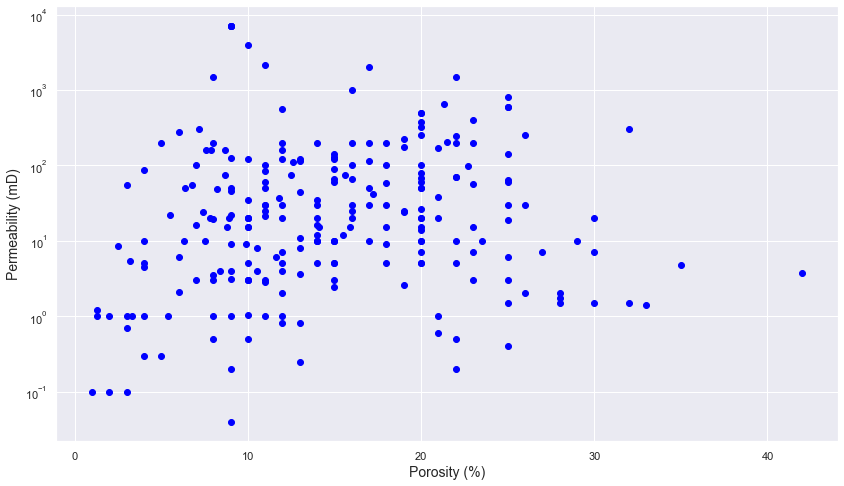

In [36]:
# Generate values for missing permeability values as a function of porosity
a = dflsoil['204_Porosity (matrix average) (%)']
b = dflsoil['210_Permeability (air average) (mD)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Porosity (%)", size=14)
plt.ylabel("Permeability (mD)", size=14)
plt.yscale('log', nonposy='clip')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
cdf = dflsoil[['210_Permeability (air average) (mD)', '204_Porosity (matrix average) (%)']]
testdf = cdf[cdf['210_Permeability (air average) (mD)'].isnull()==True].fillna(0)
traindf = cdf[cdf['210_Permeability (air average) (mD)'].isnull()==False].fillna(0)

y = traindf['210_Permeability (air average) (mD)']
traindf.drop('210_Permeability (air average) (mD)', axis=1, inplace=True)
ln_y = np.log(y)

lr.fit(traindf,ln_y)
testdf.drop('210_Permeability (air average) (mD)', axis=1, inplace=True)
#pred = lr.predict(testdf)
pred = np.exp(lr.predict(testdf))
testdf['210_Permeability (air average) (mD)'] = pred


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf = testdf.rename(columns={'204_Porosity (matrix average) (%)': '204_RPT_Porosity (matrix average) (%)', 
                                '210_Permeability (air average) (mD)': '210_RPT_Permeability (air average) (mD)'
                               })

Gradient:  [0.03976583]
Intercept:  2.360345142283724


In [38]:
dflsoil = pd.concat([dflsoil, testdf], axis=1)

dflsoil['210_Permeability (air average) (mD)'] = dflsoil['210_RPT_Permeability (air average) (mD)'].fillna(0) + dflsoil['210_Permeability (air average) (mD)'].fillna(0)

dflsoil = dflsoil.drop([
    '210_RPT_Permeability (air average) (mD)', '204_RPT_Porosity (matrix average) (%)', 
], axis = 1) 

##### Generate values for missing viscoisty values as a function of API

In [39]:
# Drop API gravity values more than 60 and 0 
#dfssoil['218_API gravity (average) (deg. API)'].hist()
#dfssoil['218_API gravity (average) (deg. API)'].value_counts(ascending=True)
dflsoil = dflsoil.drop(dflsoil[dflsoil['218_API gravity (average) (deg. API)'] > 60].index)
dflsoil = dflsoil.drop(dflsoil[dflsoil['218_API gravity (average) (deg. API)'] == 0].index)

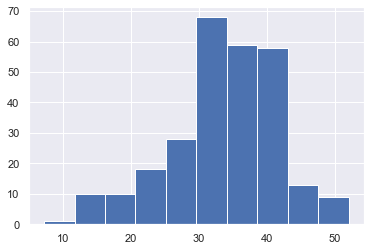

In [40]:
#dfssoil['218_API gravity (average) (deg. API)'].min()
dflsoil['218_API gravity (average) (deg. API)'].hist()

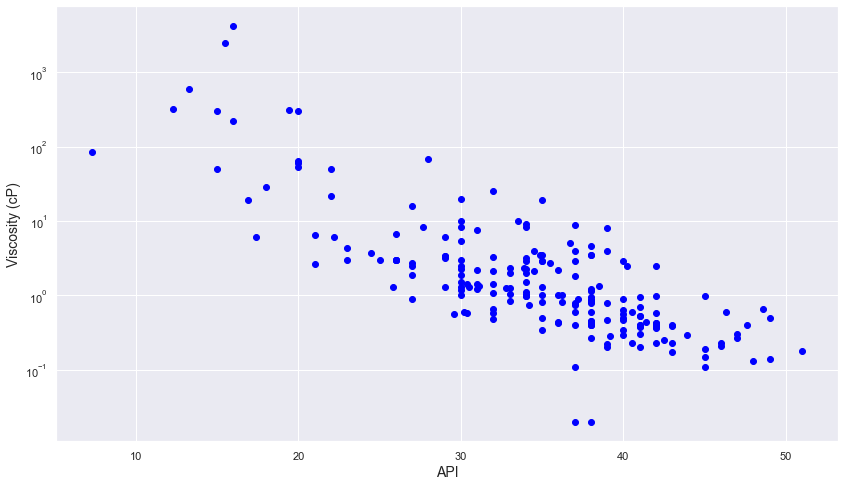

In [41]:
# Generate values for missing viscosity values as a function of API
a = dflsoil['218_API gravity (average) (deg. API)']
b = dflsoil['225_Viscosity (oil average) (cp)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("API", size=14)
plt.ylabel("Viscosity (cP)", size=14)
plt.yscale('log', nonposy='clip')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [42]:
lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
cdf2 = dflsoil[['225_Viscosity (oil average) (cp)', '218_API gravity (average) (deg. API)']]
testdf2 = cdf2[cdf2['225_Viscosity (oil average) (cp)'].isnull()==True].fillna(0)
traindf2 = cdf2[cdf2['225_Viscosity (oil average) (cp)'].isnull()==False].fillna(0)

y2 = traindf2['225_Viscosity (oil average) (cp)']
traindf2.drop('225_Viscosity (oil average) (cp)', axis=1, inplace=True)
ln_y2 = np.log(y2)

lr.fit(traindf2,ln_y2)
testdf2.drop('225_Viscosity (oil average) (cp)', axis=1, inplace=True)
#pred = lr.predict(testdf)
pred2 = np.exp(lr.predict(testdf2))
testdf2['225_Viscosity (oil average) (cp)'] = pred2


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf2 = testdf2.rename(columns={'218_API gravity (average) (deg. API)': '218_RPT_API gravity (average) (deg. API)', 
                                '225_Viscosity (oil average) (cp)': '225_RPT_Viscosity (oil average) (cp)'
                               })

Gradient:  [-0.18481379]
Intercept:  6.820346304994923


In [43]:
dflsoil = pd.concat([dflsoil, testdf2], axis=1)

dflsoil['225_Viscosity (oil average) (cp)'] = dflsoil['225_RPT_Viscosity (oil average) (cp)'].fillna(0) + dflsoil['225_Viscosity (oil average) (cp)'].fillna(0)

dflsoil = dflsoil.drop([
    '225_RPT_Viscosity (oil average) (cp)', '218_RPT_API gravity (average) (deg. API)', 
], axis = 1) 

In [44]:
dflsoil.shape

(274, 21)

In [45]:
dflsoil.isnull().sum().sort_values(ascending=False)

176_Net/gross ratio (average)                   147
252_GOR (initial average) (SCF/STB)              25
293_Original in-place oil equivalent (MMBOE)     22
118_Structural flank dip (average) (deg.)        20
161_Reservoir architecture (main)                 9
EORIOR                                            0
117_Reservoir top subsea depth (ft TVDSS)         0
11_Basin name                                     0
52_Well spacing (average) (ac)                    0
72_Onshore or offshore                            0
75_Temperature (original) (deg. F)                0
77_Pressure (original) (psi)                      0
82_Drive mechanism (main)                         0
153_Depositional system (main)                    0
149_Reservoir period                              0
307_Recovery factor (ultimate oil) (%)            0
204_Porosity (matrix average) (%)                 0
210_Permeability (air average) (mD)               0
218_API gravity (average) (deg. API)              0
225_Viscosit

##### Generate values for missing GOR values as a function of Pressure

<Figure size 1440x1080 with 0 Axes>

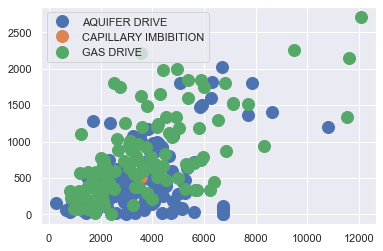

In [46]:
# Check if Drive mechanism impacts GOR
groups = dflsoil.groupby('82_Drive mechanism (main)')
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['77_Pressure (original) (psi)'], group['252_GOR (initial average) (SCF/STB)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()


plt.show()

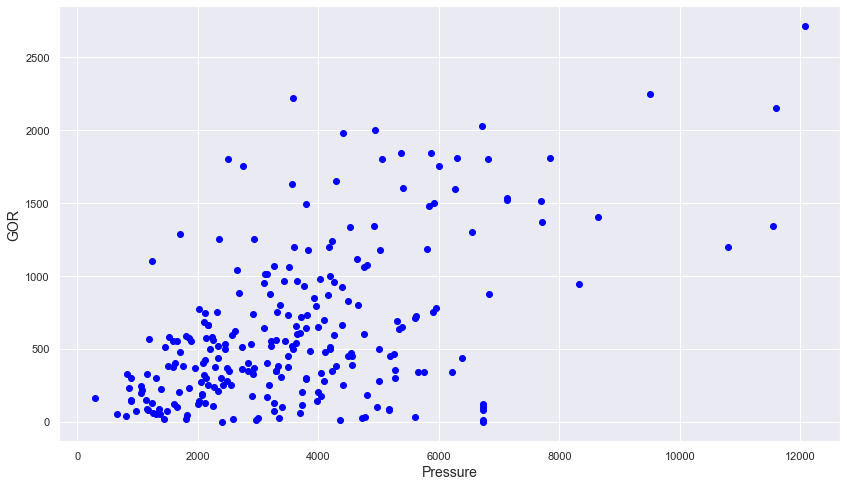

In [47]:
# Generate values for missing GOR values as a function of Pressure
a = dflsoil['77_Pressure (original) (psi)']
b = dflsoil['252_GOR (initial average) (SCF/STB)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Pressure", size=14)
plt.ylabel("GOR", size=14)
#plt.yscale('log')
#plt.xscale('log')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [48]:
lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
cdf3 = dflsoil[['252_GOR (initial average) (SCF/STB)', '77_Pressure (original) (psi)']]
testdf3 = cdf3[cdf3['252_GOR (initial average) (SCF/STB)'].isnull()==True].fillna(0)
traindf3 = cdf3[cdf3['252_GOR (initial average) (SCF/STB)'].isnull()==False].fillna(0)

y3 = traindf3['252_GOR (initial average) (SCF/STB)']
traindf3.drop('252_GOR (initial average) (SCF/STB)', axis=1, inplace=True)
#ln_y2 = np.log(y2)

lr.fit(traindf3,y3)
testdf3.drop('252_GOR (initial average) (SCF/STB)', axis=1, inplace=True)
pred3 = lr.predict(testdf3)
#pred3 = np.exp(lr.predict(testdf2))
testdf3['252_GOR (initial average) (SCF/STB)'] = pred3


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf3 = testdf3.rename(columns={'77_Pressure (original) (psi)': '77_RPT_Pressure (original) (psi)', 
                                '252_GOR (initial average) (SCF/STB)': '252_RPT_GOR (initial average) (SCF/STB)'
                               })

Gradient:  [0.14479158]
Intercept:  97.83667469639238


In [49]:
dflsoil = pd.concat([dflsoil, testdf3], axis=1)

dflsoil['252_GOR (initial average) (SCF/STB)'] = dflsoil['252_RPT_GOR (initial average) (SCF/STB)'].fillna(0) + dflsoil['252_GOR (initial average) (SCF/STB)'].fillna(0)

dflsoil = dflsoil.drop([
    '252_RPT_GOR (initial average) (SCF/STB)', '77_RPT_Pressure (original) (psi)', 
], axis = 1) 

##### Generate values for missing STOIIP values as a function of Porosity

<Figure size 1440x1080 with 0 Axes>

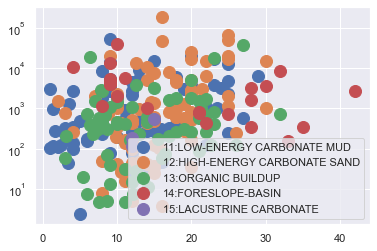

In [50]:
# Check if lithology impacts STOIIP
groups = dflsoil.groupby('153_Depositional system (main)')
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['204_Porosity (matrix average) (%)'], group['293_Original in-place oil equivalent (MMBOE)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
ax.set_yscale("log")

plt.show()

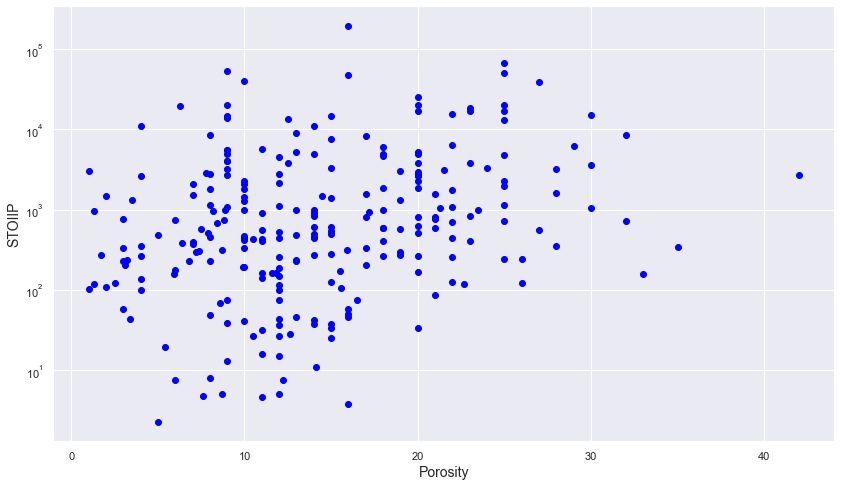

In [51]:
# Generate values for missing STOIIP values as a function of Porosity
a = dflsoil['204_Porosity (matrix average) (%)']
b = dflsoil['293_Original in-place oil equivalent (MMBOE)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Porosity", size=14)
plt.ylabel("STOIIP", size=14)
plt.yscale('log')
#plt.xscale('log')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [52]:
lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
cdf4 = dflsoil[['293_Original in-place oil equivalent (MMBOE)', '204_Porosity (matrix average) (%)']]
testdf4 = cdf4[cdf4['293_Original in-place oil equivalent (MMBOE)'].isnull()==True].fillna(0)
traindf4 = cdf4[cdf4['293_Original in-place oil equivalent (MMBOE)'].isnull()==False].fillna(0)

y4 = traindf4['293_Original in-place oil equivalent (MMBOE)']
traindf4.drop('293_Original in-place oil equivalent (MMBOE)', axis=1, inplace=True)
ln_y4 = np.log(y4)

lr.fit(traindf4,y4)
testdf4.drop('293_Original in-place oil equivalent (MMBOE)', axis=1, inplace=True)
pred4 = lr.predict(testdf4)
#pred4 = np.exp(lr.predict(testdf2))
testdf4['293_Original in-place oil equivalent (MMBOE)'] = pred4


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf4 = testdf4.rename(columns={'204_Porosity (matrix average) (%)': '204_RPT_Porosity (matrix average) (%)', 
                                '293_Original in-place oil equivalent (MMBOE)': '293_RPT_Original in-place oil equivalent (MMBOE)'
                               })

Gradient:  [235.55476336]
Intercept:  907.4999531043168


In [53]:
dflsoil = pd.concat([dflsoil, testdf4], axis=1)

dflsoil['293_Original in-place oil equivalent (MMBOE)'] = dflsoil['293_Original in-place oil equivalent (MMBOE)'].fillna(0) + dflsoil['293_RPT_Original in-place oil equivalent (MMBOE)'].fillna(0)

dflsoil = dflsoil.drop([
    '293_RPT_Original in-place oil equivalent (MMBOE)', '204_RPT_Porosity (matrix average) (%)', 
], axis = 1) 

##### Drop rows without NTG since no correlation can be found between NTG and Porosity 

<Figure size 1440x1080 with 0 Axes>

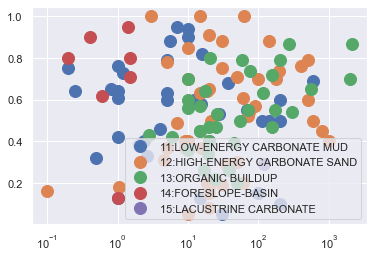

In [54]:
# Check if lithology impacts NTG
groups = dflsoil.groupby('153_Depositional system (main)')
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['210_Permeability (air average) (mD)'], group['176_Net/gross ratio (average)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
#ax.set_yscale("log")
ax.set_xscale("log")

plt.show()

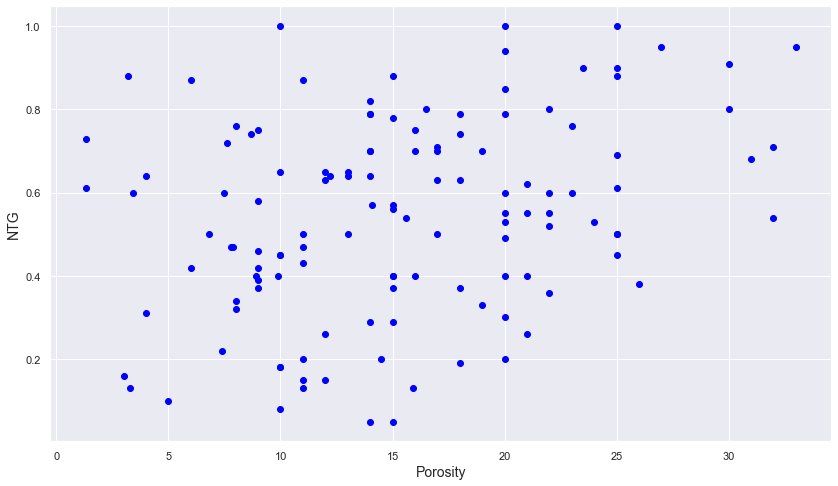

In [55]:
# Generate values for missing STOIIP values as a function of Porosity
a = dflsoil['204_Porosity (matrix average) (%)']
b = dflsoil['176_Net/gross ratio (average)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Porosity", size=14)
plt.ylabel("NTG", size=14)
#plt.yscale('log')
#|plt.xscale('log')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [56]:
dflsoil = dflsoil.dropna(axis=0, subset=['176_Net/gross ratio (average)'])

##### Fill missing values for Structural Flank Dip with average

In [57]:
#fill missing values for Structural Flank Dip with average
#dfssoil['118_Structural flank dip (average) (deg.)'] = dfssoil['118_Structural flank dip (average) (deg.)'].apply(lambda x: x.fillna(x.mean().iat[0]))

mean_flankdip=dflsoil['118_Structural flank dip (average) (deg.)'].mean()
dflsoil['118_Structural flank dip (average) (deg.)'].fillna(value=mean_flankdip, inplace=True)

In [58]:
#dfssoil = dfssoil.dropna(axis=0, subset=['118_Structural flank dip (average) (deg.)'])

##### Fill missing reservoir architecture with mode

In [59]:
print(dflsoil['161_Reservoir architecture (main)'].value_counts())

LAYER-CAKE                            73
JIGSAW-PUZZLE                         31
TANK LIKE                             12
LABYRINTH                              4
JIGSAW-PUZZLE/LAYER-CAKE               3
JIGSAW-PUZZLE/TANK LIKE                2
JIGSAW-PUZZLE/LABYRINTH                1
JIGSAW-PUZZLE/LABYRINTH/LAYER-CAKE     1
Name: 161_Reservoir architecture (main), dtype: int64


In [60]:
#dflsoil["161_Reservoir architecture (main)"] = dflsoil.apply(lambda x: x.fillna(x.mode().iat[0]))
dflsoil['161_Reservoir architecture (main)'] = dflsoil['161_Reservoir architecture (main)'].fillna(dflsoil['161_Reservoir architecture (main)'].mode()[0])

In [61]:
dflsoil.isnull().sum().sort_values(ascending=False)

EORIOR                                          0
149_Reservoir period                            0
11_Basin name                                   0
52_Well spacing (average) (ac)                  0
72_Onshore or offshore                          0
75_Temperature (original) (deg. F)              0
77_Pressure (original) (psi)                    0
82_Drive mechanism (main)                       0
117_Reservoir top subsea depth (ft TVDSS)       0
118_Structural flank dip (average) (deg.)       0
153_Depositional system (main)                  0
307_Recovery factor (ultimate oil) (%)          0
161_Reservoir architecture (main)               0
176_Net/gross ratio (average)                   0
204_Porosity (matrix average) (%)               0
210_Permeability (air average) (mD)             0
218_API gravity (average) (deg. API)            0
225_Viscosity (oil average) (cp)                0
252_GOR (initial average) (SCF/STB)             0
293_Original in-place oil equivalent (MMBOE)    0


In [62]:
dflsoil.shape

(127, 21)

In [63]:
dflsoil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 7 to 350
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   10_Region                                     127 non-null    object 
 1   11_Basin name                                 127 non-null    object 
 2   52_Well spacing (average) (ac)                127 non-null    float64
 3   72_Onshore or offshore                        127 non-null    object 
 4   75_Temperature (original) (deg. F)            127 non-null    float64
 5   77_Pressure (original) (psi)                  127 non-null    float64
 6   82_Drive mechanism (main)                     127 non-null    object 
 7   117_Reservoir top subsea depth (ft TVDSS)     127 non-null    float64
 8   118_Structural flank dip (average) (deg.)     127 non-null    float64
 9   149_Reservoir period                          127 non-null    obj

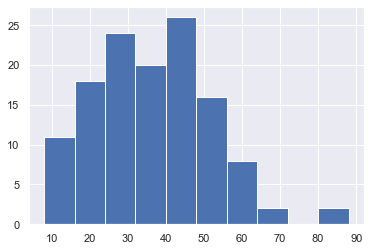

In [64]:
dflsoil['307_Recovery factor (ultimate oil) (%)'].hist()

In [65]:
print(dflsoil['149_Reservoir period'].value_counts())

CRETACEOUS               42
JURASSIC                 17
CARBONIFEROUS            14
DEVONIAN                 14
NEOGENE                  13
PERMIAN                   9
NEOGENE/PALEOGENE         5
PROTEROZOIC               3
PALEOGENE/CRETACEOUS      3
PALEOGENE                 2
PERMIAN/CARBONIFEROUS     2
ORDOVICIAN                1
TRIASSIC/PERMIAN          1
CRETACEOUS/JURASSIC       1
Name: 149_Reservoir period, dtype: int64
